In [1]:
## Audio Classification using Machine Learning 


In [2]:
!pip install librosa


You should consider upgrading via the 'C:\Users\sriva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename='UrbanSound8K/6508-9-0-4.wav'

In [5]:
import IPython.display as ipd
import librosa #used maily beacuse it can converge signals,it can repersent audio signal between +1 and -1,It will convert audio file into 22kHz  
import librosa.display

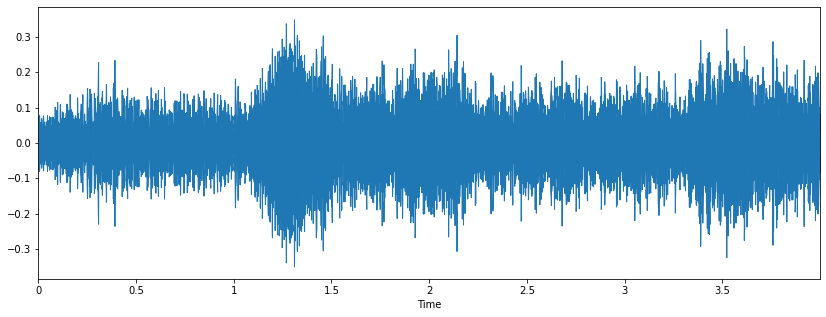

In [6]:
##puppy_bark
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate ##how many times a sound is sampled per second i.e 22kHz

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio 

array([[ 2469,  2043],
       [ 2443,  2110],
       [ 2420,  2141],
       ...,
       [-3313, -1786],
       [-3650, -1972],
       [-3814, -2320]], dtype=int16)

In [11]:
data


array([ 0.05088667,  0.07510009,  0.06540349, ..., -0.0507298 ,
       -0.06709649, -0.09151142], dtype=float32)

In [12]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
## check wheather dataset is imbalanced 
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Audio Classification Data Preprocessing 

In [14]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/6508-9-0-4.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [15]:
print(librosa_audio_data)

[ 0.05088667  0.07510009  0.06540349 ... -0.0507298  -0.06709649
 -0.09151142]


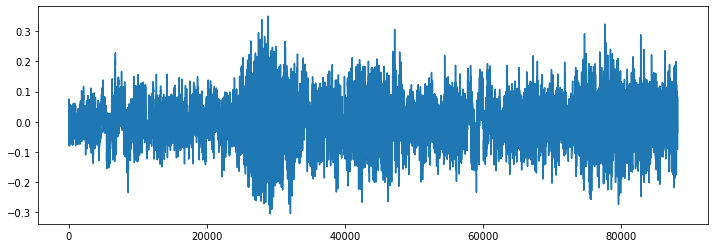

In [16]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## Observation
### Here Librosa converts the signal to mono, meaning the channel will always be 1 

In [17]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [18]:
wave_audio

array([[ 2469,  2043],
       [ 2443,  2110],
       [ 2420,  2141],
       ...,
       [-3313, -1786],
       [-3650, -1972],
       [-3814, -2320]], dtype=int16)

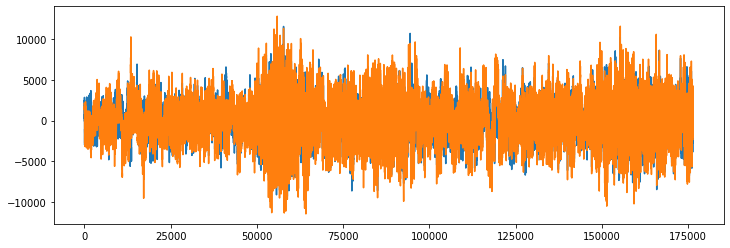

In [19]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [20]:
## Here both the channels are converted into a single channel by the librosa library

### Now using the technique of MFCC that is taking particular audio convert it into some features based on time and frequency charcterstics which can be used to do the sound classification

In [132]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [133]:
mfccs# This is the pattern which is obtained by the MFCC principle

array([[-221.37077   , -230.47072   , -235.97699   , ..., -197.59674   ,
        -184.45981   , -178.88852   ],
       [ 131.29688   ,  146.18304   ,  152.03441   , ...,  195.42902   ,
         194.85846   ,  175.27844   ],
       [ -16.370232  ,  -25.894497  ,  -34.283653  , ...,  -31.79251   ,
         -37.535294  ,  -21.897333  ],
       ...,
       [   0.34732884,   -0.26230833,   -4.5283146 , ...,   -4.7085805 ,
          -7.1241384 ,  -10.770912  ],
       [   2.7453673 ,    2.55828   ,    4.9768295 , ...,    1.4164304 ,
          -0.42314184,   -2.455437  ],
       [  -5.891863  ,   -7.1225204 ,   -2.3916163 , ...,   -3.430451  ,
          -6.4440575 ,   -4.4182034 ]], dtype=float32)

In [134]:
## Extracting the MFCC for all the files
import pandas as pd
import os
import librosa 
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [135]:
def features_extractor(file): ##This is a function used for the extraction of features for one audio file 
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [136]:
import numpy as np
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    


3555it [06:42,  8.29it/s]C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [14:39, 12.67it/s]C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [14:39, 17.46it/s]C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [15:14,  9.55it/s]


In [137]:
## converting extracted_features for a particular class
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [138]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [139]:
X.shape

(8732, 40)

In [140]:
### Label Encoding
y=np.array(pd.get_dummies(y))


In [141]:
y.shape


(8732, 10)

In [142]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [143]:
X_train.shape

(6985, 40)

In [144]:
X_test.shape

(1747, 40)

In [145]:
y_train.shape

(6985, 10)

In [146]:
y_test.shape

(1747, 10)

In [147]:
X_train #mapping these extracted features with y

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537492e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [148]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

# Creation of the model

In [149]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [151]:
num_labels=y.shape[1] #to get the number of classes

In [152]:
model=Sequential()
###first layer
model.add(Dense(256,input_shape=(40,)))## 100 nuerons with input shape of 40 because 40 is obtained for the dataset
model.add(Activation('relu'))
model.add(Dropout(0.3))##used to prevent the model from overfitting
###second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###third layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###final layer
model.add(Dense(num_labels))##number of classes
model.add(Activation('softmax'))##used to predict the multiclass probability distribution

In [153]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               10496     
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [154]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [155]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 25

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
275/280 [============================>.] - ETA: 0s - loss: 3.7201 - accuracy: 0.2134
Epoch 00001: val_loss improved from inf to 1.92152, saving model to saved_models\audio_classification.hdf5
280/280 [==============================] - 3s 7ms/step - loss: 3.6940 - accuracy: 0.2147 - val_loss: 1.9215 - val_accuracy: 0.3452
Epoch 2/100
274/280 [============================>.] - ETA: 0s - loss: 1.8943 - accuracy: 0.3147
Epoch 00002: val_loss improved from 1.92152 to 1.61992, saving model to saved_models\audio_classification.hdf5
280/280 [==============================] - 2s 6ms/step - loss: 1.8896 - accuracy: 0.3155 - val_loss: 1.6199 - val_accuracy: 0.4236
Epoch 3/100
279/280 [============================>.] - ETA: 0s - loss: 1.6438 - accuracy: 0.4032
Epoch 00003: val_loss improved from 1.61992 to 1.40176, saving model to saved_models\audio_classification.hdf5
280/280 [==============================] - 1s 5ms/step - loss: 1.6432 - accuracy: 0.4033 - val_loss: 1.4018 - val_accu

In [156]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9170005917549133
